<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #020b22ff, #33485eff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Facial Recognition System using Convolutional Neural Networks
    </h1>
</div>


<h4 style="color:#96c9ffff">1. Importing TensorFlow, OpenCV, Matplotlib, NumPy libraries for data manipulation and image preprocessing with ImageDataGenerator for training preparation.</h4>


In [20]:
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install opencv-python

^C


   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 762.0 kB/s eta 0:00:51
    --------------------------------------- 0.8/39.0 MB 763.2 kB/s eta 0:00:51
    --------------------------------------- 0.8/39.0 MB 763.2 kB/s eta 0:00:51
   - -------------------------------------- 1.0/39.0 MB 762.8 kB/s eta 0:00:50
   - -------------------------------------- 1.0/39.0 MB 762.8 kB/s eta 0:00:50
   - -------------------------------------- 1.3/39.0 MB 745.8 kB/s eta 0:00:51
   - -------------------------------------- 1.3/39.0 MB 745.8 kB/s eta 0:00:51
   - ----------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h4 style="color:#96c9ffff">2. Setting the path for the LFW dataset images directory to the specified location on the local system.</h4>

In [9]:
Dataimages = Path(r"D:\GTC\Final Project\lfw-deepfunneled\lfw-deepfunneled")

<h4 style="color:#96c9ffff">3. Selecting a random person directory and a random image file from the LFW dataset directory for further processing.</h4>

In [10]:
person = random.choice([p for p in Dataimages.iterdir() if p.is_dir()])
ImagePath = random.choice([p for p in person.iterdir() if p.suffix.lower() in [".jpg", ".jpeg", ".png"]])

<h4 style="color:#96c9ffff">4. Reading a randomly selected image from the file, converting it to both RGB and BGR color formats using OpenCV.</h4>

In [11]:
data = np.fromfile(str(ImagePath), dtype=np.uint8)
Image = cv2.imdecode(data, cv2.IMREAD_COLOR)     
ImgRGB = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)   
ImgBGR = Image                                 

<h4 style="color:#96c9ffff">5. Displaying the selected person's image before any preprocessing, showing the image in RGB format using Matplotlib.</h4>

Person: Sophie


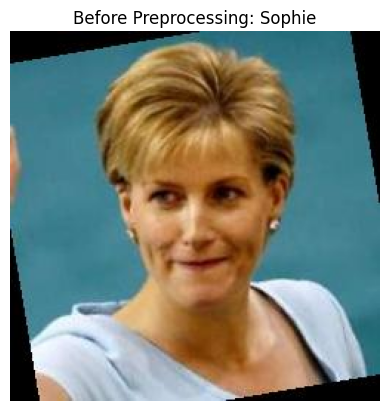

In [12]:
print("Person:", person.name)
plt.imshow(ImgRGB); plt.axis("off"); plt.title(f"Before Preprocessing: {person.name}")
plt.show()

<h4 style="color:#96c9ffff">6. Resizing the selected image to 128x128 and normalizing it to [0,1] for further processing.</h4>

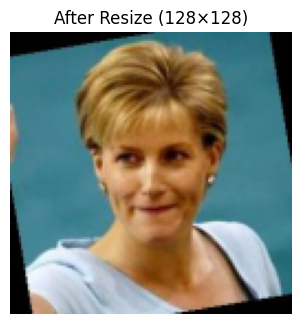

In [13]:
TargetSize = (128, 128)
ResizedRgb = cv2.resize(ImgRGB, TargetSize, interpolation=cv2.INTER_AREA)
normalization = (ResizedRgb / 255.0).astype("float32")
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(ResizedRgb); plt.axis("off"); plt.title("After Resize (128×128)")
plt.show()

<h4 style="color:#96c9ffff">7. Detecting faces in the image using Haar Cascade Classifier and converting the image to grayscale for face detection.</h4>

In [14]:
CasCade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(ImgBGR, cv2.COLOR_BGR2GRAY)
faces = CasCade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(40,40))


<h4 style="color:#96c9ffff">8. Detecting faces using Haar Cascade, applying a margin around the detected face, and cropping the face region from the image for further processing.</h4>

Faces detected: 1


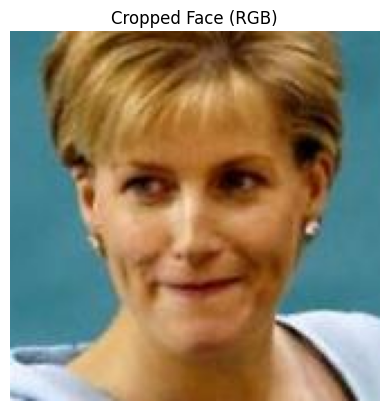

In [15]:
print("Faces detected:", len(faces))

margin = 0.2
Hight, width = ImgBGR.shape[:2]

if len(faces) > 0:
    x, y, w, h = max(faces, key=lambda b: b[2]*b[3]) 
    mx, my = int(margin*w), int(margin*h)
    x1, y1 = max(0, x-mx), max(0, y-my)
    x2, y2 = min(width, x+w+mx), min(Hight, y+h+my)
else:
    side = min(Hight, width)
    y1 = (Hight - side)//2; x1 = (width - side)//2
    x2, y2 = x1 + side, y1 + side

CropBGR = ImgBGR[y1:y2, x1:x2]
CropRGB = cv2.cvtColor(CropBGR, cv2.COLOR_BGR2RGB)

plt.imshow(CropRGB); plt.axis("off"); plt.title("Cropped Face (RGB)")
plt.show()

<h4 style="color:#96c9ffff">9. Drawing the detected face bounding box on the original RGB image (convert to BGR for OpenCV drawing, draw rectangle with (x1,y1)-(x2,y2), then convert back to RGB for display).</h4>

In [16]:
vis = ImgRGB.copy()
vis_bgr = cv2.cvtColor(vis, cv2.COLOR_RGB2BGR)
cv2.rectangle(vis_bgr, (x1, y1), (x2, y2), (255,0,0), 2)
vis = cv2.cvtColor(vis_bgr, cv2.COLOR_BGR2RGB)

<h4 style="color:#96c9ffff">10. Displaying the original image with the face detection rectangle and the cropped face side by side for comparison.</h4>

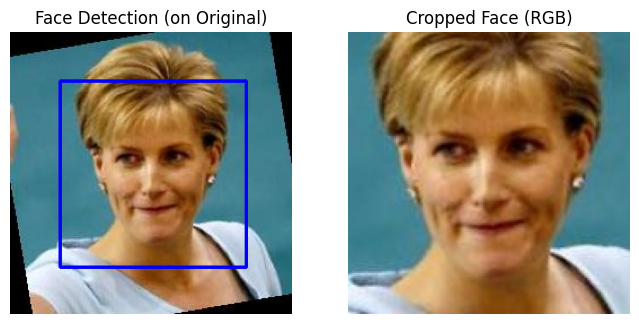

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(vis);     plt.axis("off"); plt.title("Face Detection (on Original)")
plt.subplot(1,2,2); plt.imshow(CropRGB); plt.axis("off"); plt.title("Cropped Face (RGB)")
plt.show()

<h4 style="color:#96c9ffff">11. Applying CLAHE to the cropped face by equalizing the Y channel in YCrCb space, converting back to RGB, and normalizing to [0,1] for illumination enhancement.</h4>

In [18]:
crop_rgb = CropRGB

apply_clahe = True
if apply_clahe:
    crop_rgb_normalized = crop_rgb / 255.0
    ycc = cv2.cvtColor((crop_rgb_normalized * 255).astype("uint8"), cv2.COLOR_RGB2YCrCb)
    y, cr, cb = cv2.split(ycc)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    y_eq = clahe.apply(y)
    ycc_eq = cv2.merge([y_eq, cr, cb])
    eq_rgb = cv2.cvtColor(ycc_eq, cv2.COLOR_YCrCb2RGB).astype("float32") / 255.0
else:
    eq_rgb = crop_rgb / 255.0


<h4 style="color:#96c9ffff">12. Displaying the original cropped face and the cropped face after applying CLAHE side by side to compare the illumination enhancement.</h4>

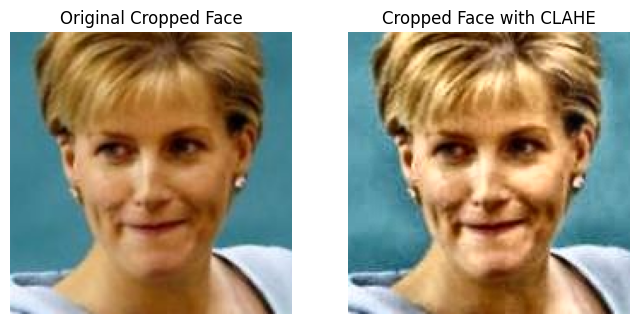

In [19]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(crop_rgb); plt.axis("off"); plt.title("Original Cropped Face")
plt.subplot(1,2,2); plt.imshow(eq_rgb);   plt.axis("off"); plt.title("Cropped Face with CLAHE")
plt.show()


### All images in the LFW Deepfunneled dataset are preprocessed to have a fixed resolution of 250×250 pixels. This explains why the histograms of width, height, and area show a single spike — there is no variation in image dimensions. Any variability in the dataset comes from the pixel intensity values (color/brightness), not from the image sizes.

Total images processed: 13233


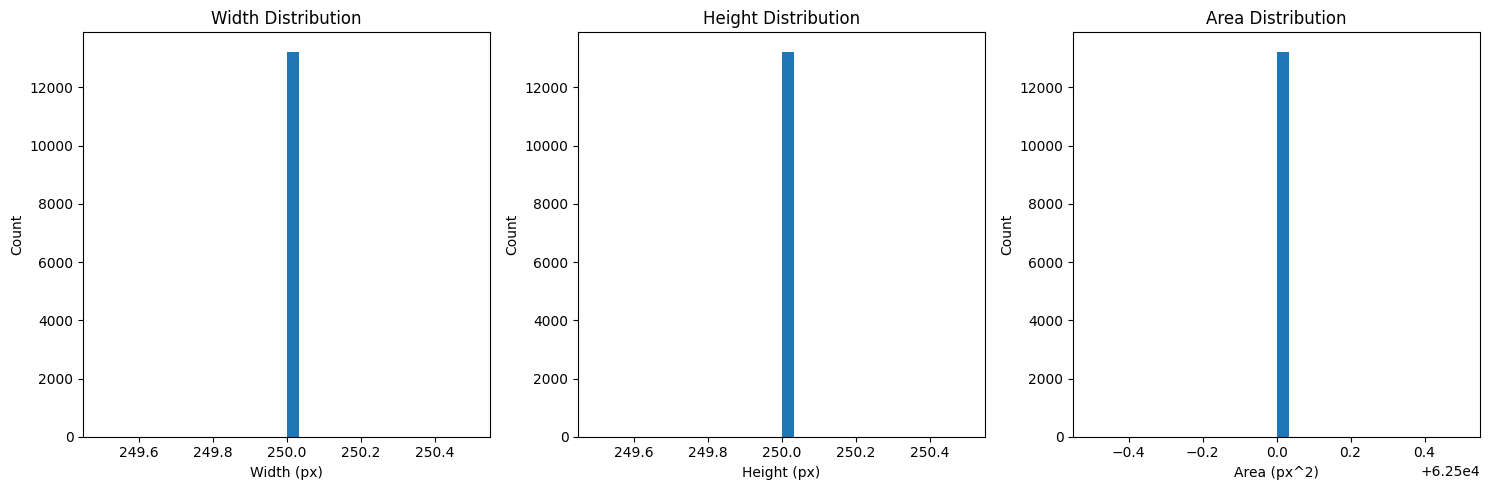

In [ ]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

widths, heights, areas = [], [], []

valid_exts = [".jpg", ".jpeg", ".png", ".JPG", ".JPEG", ".PNG"]

for img_path in Dataimages.rglob("*"):
    if img_path.suffix in valid_exts:
        try:
            img = Image.open(img_path)
            w, h = img.size  # (width, height)
            widths.append(w)
            heights.append(h)
            areas.append(w * h)
        except Exception as e:
            print("Could not open:", img_path, "| Error:", e)

print(f"Total images processed: {len(areas)}")

# Plot histograms
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(widths, bins=30)
plt.title("Width Distribution")
plt.xlabel("Width (px)")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(heights, bins=30)
plt.title("Height Distribution")
plt.xlabel("Height (px)")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(areas, bins=30)
plt.title("Area Distribution")
plt.xlabel("Area (px^2)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [49]:
matchpairsDevTest_df = pd.read_csv("matchpairsDevTest.csv")
print("Total pairs:", len(matchpairsDevTest_df))
print("Unique people:", matchpairsDevTest_df["name"].nunique())
print(matchpairsDevTest_df.head())


Total pairs: 500
Unique people: 353
               name  imagenum1  imagenum2
0      Abdullah_Gul         13         14
1      Abdullah_Gul         13         16
2  Abdullatif_Sener          1          2
3    Adel_Al-Jubeir          1          3
4         Al_Pacino          1          2


In [50]:
all_imgs = pd.concat([matchpairsDevTest_df["imagenum1"], matchpairsDevTest_df["imagenum2"]])
print("Unique images referenced:", all_imgs.nunique())


Unique images referenced: 35


In [51]:
from collections import Counter
counts = Counter(all_imgs)
print("Most used image indices:", counts.most_common(10))


Most used image indices: [(1, 292), (2, 288), (3, 141), (4, 84), (5, 39), (6, 30), (8, 17), (7, 16), (10, 13), (9, 11)]


### This code randomly selects a pair from the match_pair dataset and visualizes it.
### Each row corresponds to two images of the same person (a positive pair).
### The images are loaded from the dataset folder and displayed side by side
### to confirm that both belong to the same identity.


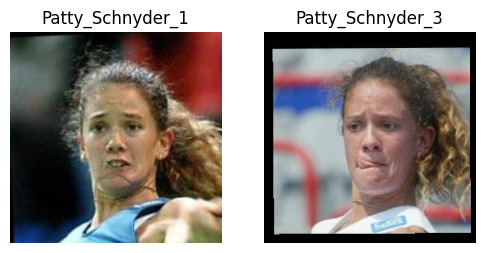

In [52]:
import matplotlib.pyplot as plt
from PIL import Image
import random
from pathlib import Path

base = Path("D:/GTC/Final Project/lfw-deepfunneled/lfw-deepfunneled")


row = matchpairsDevTest_df.sample(1).iloc[0]
person = row["name"]
img1 = base / person / f"{person}_{int(row['imagenum1']):04d}.jpg"
img2 = base / person / f"{person}_{int(row['imagenum2']):04d}.jpg"


fig, axes = plt.subplots(1, 2, figsize=(6,3))
axes[0].imshow(Image.open(img1))
axes[0].set_title(f"{person}_{row['imagenum1']}")
axes[0].axis("off")

axes[1].imshow(Image.open(img2))
axes[1].set_title(f"{person}_{row['imagenum2']}")
axes[1].axis("off")

plt.show()


### This counts how many times each person appears in mismatched pairs
### (whether they are in the first or second column).
### It helps identify if some people are over-represented in negative pairs.


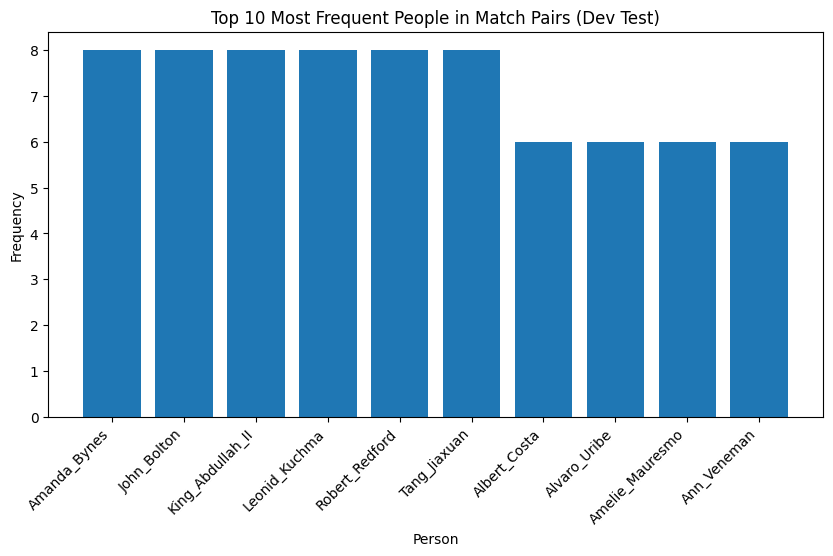

In [90]:
counts = Counter(matchpairsDevTest_df["name"]) + Counter(matchpairsDevTest_df["name"])

top10 = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10,5))
plt.bar(top10.keys(), top10.values())
plt.title("Top 10 Most Frequent People in Match Pairs (Dev Test)")
plt.xlabel("Person")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


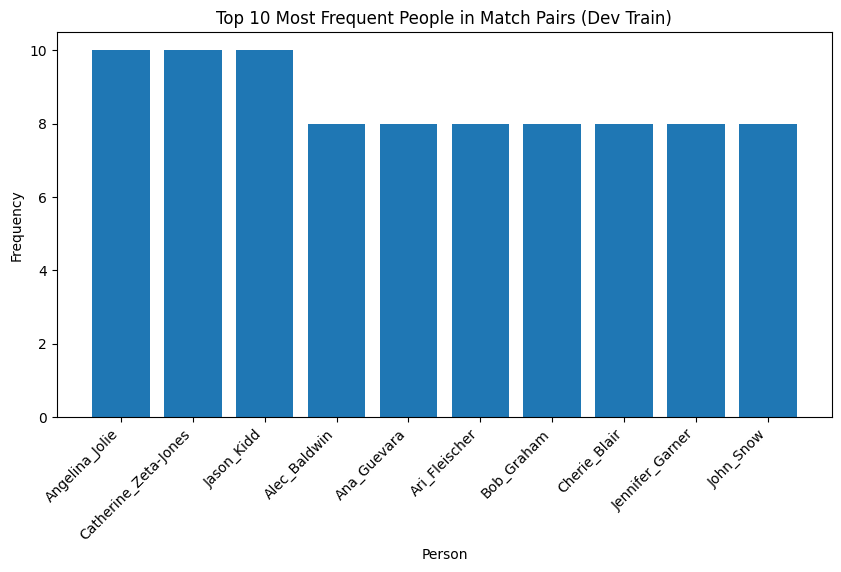

In [89]:
counts = Counter(matchpairsDevTrain_df["name"]) + Counter(matchpairsDevTrain_df["name"])

top10 = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10,5))
plt.bar(top10.keys(), top10.values())
plt.title("Top 10 Most Frequent People in Match Pairs (Dev Train)")
plt.xlabel("Person")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


### This checks if the same mismatched pair appears more than once in the dataset.
### Duplicate pairs could bias training and reduce variety in negative examples.


In [80]:
Test_duplicates = matchpairsDevTest_df.duplicated().sum()
print("Duplicate mismatched pairs in test data:", Test_duplicates)
Train_duplicates = matchpairsDevTrain_df.duplicated().sum()
print("Duplicate mismatched pairs in train data:", Train_duplicates)


Duplicate mismatched pairs in test data: 0
Duplicate mismatched pairs in train data: 0


#### This code loads a dataset of mismatched face pairs (mismatchpairsDevTest.csv) from the LFW-deepfunneled dataset and randomly selects one pair for visualization. Each row in the file contains two different people with their corresponding image numbers. The script constructs the image file paths using the person’s name and image number, then loads the images with PIL. Finally, it displays the two images side by side using Matplotlib, with titles showing the person’s name and image number. This allows us to visually inspect mismatched pairs and confirm that the dataset correctly represents faces of different individuals.

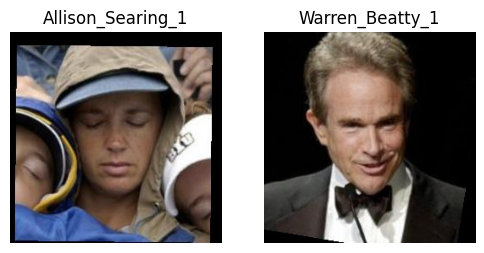

In [77]:
import random
from pathlib import Path
from PIL import Image

base = Path("D:/GTC/Final Project/lfw-deepfunneled/lfw-deepfunneled")
mismatchpairsDevTest_df = pd.read_csv("mismatchpairsDevTest.csv")
# pick a random mismatch
row = mismatchpairsDevTest_df.sample(1).iloc[0]

# person A
person1 = row["name"]
img1 = base / person1 / f"{person1}_{int(row['imagenum1']):04d}.jpg"

# person B
person2 = row["name.1"]
img2 = base / person2 / f"{person2}_{int(row['imagenum2']):04d}.jpg"

# plot
fig, axes = plt.subplots(1, 2, figsize=(6,3))
axes[0].imshow(Image.open(img1))
axes[0].set_title(f"{person1}_{row['imagenum1']}")
axes[0].axis("off")

axes[1].imshow(Image.open(img2))
axes[1].set_title(f"{person2}_{row['imagenum2']}")
axes[1].axis("off")

plt.show()


#### This code snippet randomly selects one mismatched pair of faces from the mismatchpairsDevTrain.csv dataset and visualizes them side by side. Each row in the dataset represents two different individuals along with their respective image numbers. The script constructs the correct image paths by combining the base directory path, the person’s name, and the zero-padded image number. It then loads the images using PIL and displays them using Matplotlib, with the titles showing each person’s name and their image number. This provides a quick way to visually confirm that the mismatched pairs in the training dataset indeed contain two different people.

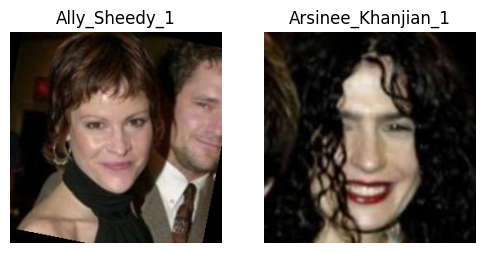

In [ ]:
mismatchpairsDevTrain_df = pd.read_csv("mismatchpairsDevTrain.csv")

row = mismatchpairsDevTrain_df.sample(1).iloc[0]

person1 = row["name"]
img1 = base / person1 / f"{person1}_{int(row['imagenum1']):04d}.jpg"


person2 = row["name.1"]
img2 = base / person2 / f"{person2}_{int(row['imagenum2']):04d}.jpg"


fig, axes = plt.subplots(1, 2, figsize=(6,3))
axes[0].imshow(Image.open(img1))
axes[0].set_title(f"{person1}_{row['imagenum1']}")
axes[0].axis("off")

axes[1].imshow(Image.open(img2))
axes[1].set_title(f"{person2}_{row['imagenum2']}")
axes[1].axis("off")

plt.show()


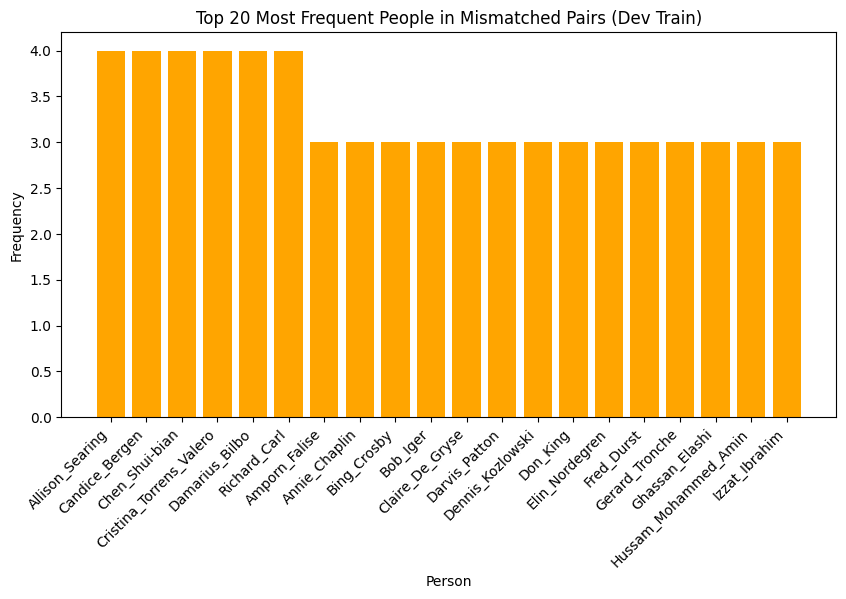

In [95]:
counts = Counter(mismatchpairsDevTrain_df["name"]) + Counter(mismatchpairsDevTrain_df["name.1"])


top20 = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(10,5))
plt.bar(top10.keys(), top10.values(), color="orange")
plt.title("Top 20 Most Frequent People in Mismatched Pairs (Dev Train)")
plt.xlabel("Person")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


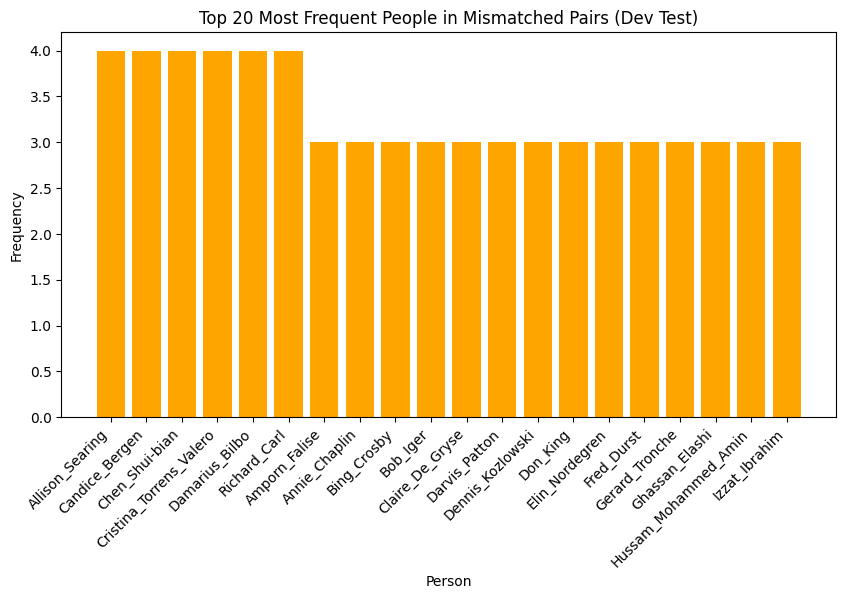

In [94]:
counts = Counter(mismatchpairsDevTest_df["name"]) + Counter(mismatchpairsDevTest_df["name.1"])


top20 = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(10,5))
plt.bar(top10.keys(), top20.values(), color="orange")
plt.title("Top 20 Most Frequent People in Mismatched Pairs (Dev Test)")
plt.xlabel("Person")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


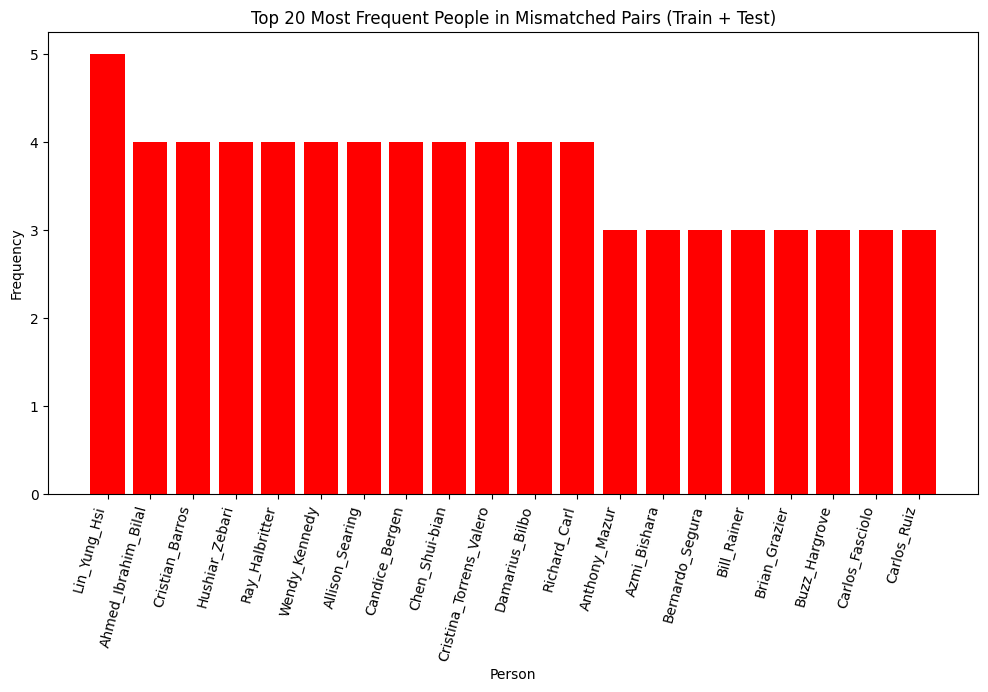

In [97]:
from collections import Counter
import matplotlib.pyplot as plt

counts_train = Counter(mismatchpairsDevTrain_df["name"]) + Counter(mismatchpairsDevTrain_df["name.1"])
counts_test = Counter(mismatchpairsDevTest_df["name"]) + Counter(mismatchpairsDevTest_df["name.1"])
total_counts = counts_train + counts_test

top20 = dict(sorted(total_counts.items(), key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(12,6))
plt.bar(top20.keys(), top20.values(), color="red")
plt.title("Top 20 Most Frequent People in Mismatched Pairs (Train + Test)")
plt.xlabel("Person")
plt.ylabel("Frequency")
plt.xticks(rotation=75, ha="right")
plt.show()
